<a href="https://colab.research.google.com/github/Anishma-110/Assignment-1/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/DSA/Data/Training_data.csv'

df_training = pd.read_csv(filepath)
df_training.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No


In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_testing = pd.read_csv('/content/drive/MyDrive/DSA/Data/Testing_data.csv')
df_testing.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [ ]:
df_testing = pd.read_csv('/content/drive/MyDrive/DSA/Data/Testing_data.csv')
df_testing.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [ ]:
df_testing.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [ ]:
df_training.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
df_training.shape

(5634, 21)

In [ ]:
df_testing.shape

(1409, 21)

In [ ]:
df_training.duplicated().sum()

np.int64(0)

In [ ]:
df_testing.duplicated().sum()

np.int64(0)

#missing values handling


In [ ]:
df_training.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
df_testing.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df_training.drop('customerID', axis=1, inplace=True)

In [ ]:
df_training['gender'].fillna(df_training['gender'].mode()[0], inplace=True)
df_training['OnlineSecurity'].fillna(df_training['OnlineSecurity'].mode()[0], inplace=True)


/tmp/ipython-input-3125940164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_training['gender'].fillna(df_training['gender'].mode()[0], inplace=True)
/tmp/ipython-input-3125940164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
df_training['TotalCharges'] = pd.to_numeric(df_training['TotalCharges'], errors='coerce')
df_training['TotalCharges'].fillna(df_training['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2285082799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_training['TotalCharges'].fillna(df_training['TotalCharges'].median(), inplace=True)


In [ ]:
df_training['MonthlyCharges'].fillna(df_training['MonthlyCharges'].median(), inplace=True)


/tmp/ipython-input-1838212389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_training['MonthlyCharges'].fillna(df_training['MonthlyCharges'].median(), inplace=True)


In [ ]:
df_training.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Remove unwanted columns

In [ ]:
df_training.drop(columns=['Partner', 'Dependents'], inplace=True)
df_testing.drop(columns=['Partner', 'Dependents'], inplace=True)

In [ ]:
df_training['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [ ]:
df_training['OnlineSecurity'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_training['OnlineBackup'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_training['DeviceProtection'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [ ]:
df_training['TechSupport'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [ ]:
df_training['StreamingTV'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_training['StreamingMovies'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_training['MultipleLines'] = df_training['MultipleLines'].replace('No phone service', 'No')
df_training['OnlineSecurity'] = df_training['OnlineSecurity'].replace('No internet service', 'No')
df_training['OnlineBackup'] = df_training['OnlineBackup'].replace('No internet service', 'No')
df_training['DeviceProtection'] = df_training['DeviceProtection'].replace('No internet service', 'No')
df_training['TechSupport'] = df_training['TechSupport'].replace('No internet service', 'No')
df_training['StreamingTV'] = df_training['StreamingTV'].replace('No internet service', 'No')
df_training['StreamingMovies'] = df_training['StreamingMovies'].replace('No internet service', 'No')

In [ ]:
df_training.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [ ]:
df_testing.nunique()

,0
customerID,1409
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [ ]:
df_testing['MultipleLines'] = df_testing['MultipleLines'].replace('No phone service', 'No')
df_testing['OnlineSecurity'] = df_testing['OnlineSecurity'].replace('No internet service', 'No')
df_testing['OnlineBackup'] = df_testing['OnlineBackup'].replace('No internet service', 'No')
df_testing['DeviceProtection'] = df_testing['DeviceProtection'].replace('No internet service', 'No')
df_testing['TechSupport'] = df_testing['TechSupport'].replace('No internet service', 'No')
df_testing['StreamingTV'] = df_testing['StreamingTV'].replace('No internet service', 'No')
df_testing['StreamingMovies'] = df_testing['StreamingMovies'].replace('No internet service', 'No')

In [ ]:
df_testing.nunique()

,0
customerID,1409
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2


#Outliers

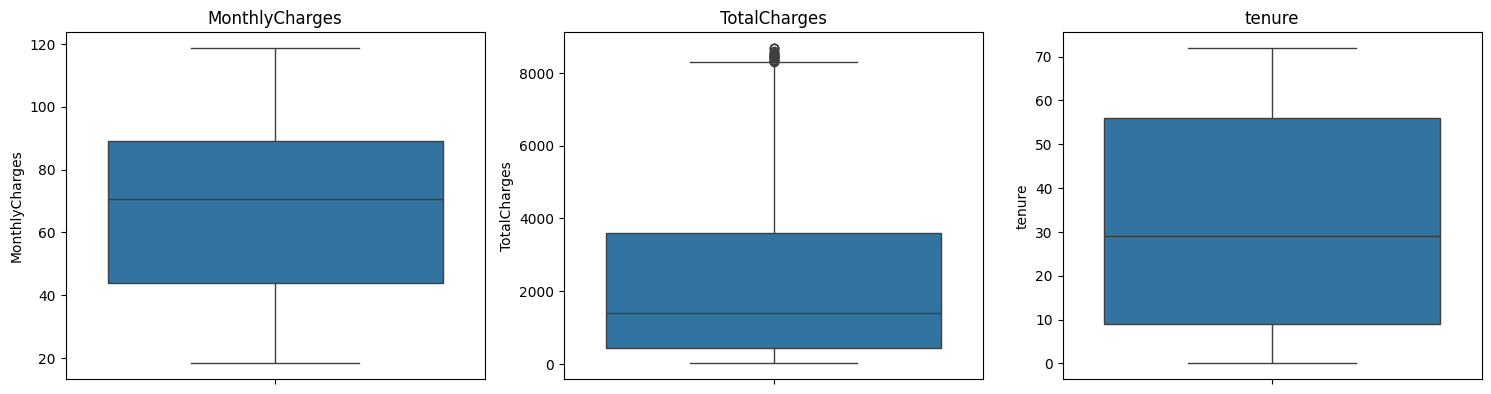

In [ ]:
plt.figure(figsize=(20, 15))
num=['MonthlyCharges', 'TotalCharges', 'tenure']
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_training[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df_training['TotalCharges'].quantile(0.25)
Q3 = df_training['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
print(Q1,Q3,IQR,low_limit,up_limit)

446.0625 3590.5375 3144.475 -4270.65 8307.25


In [ ]:
non_outliers = ~((df_training['TotalCharges'] < low_limit) | (df_training['TotalCharges'] > up_limit))
df_training_new=df_training[non_outliers]

In [ ]:
df_training.shape

(5634, 18)

In [ ]:
df_training_new.shape

(5610, 18)

#Correlation Heatmap

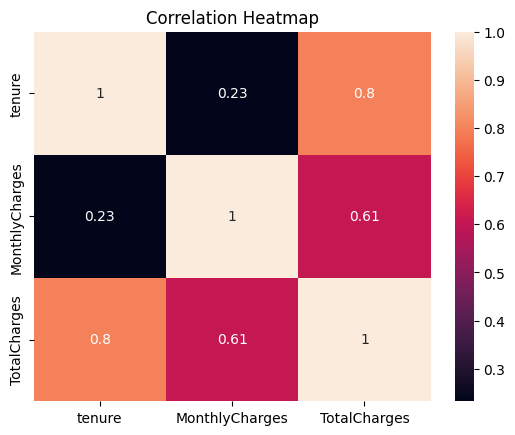

In [ ]:
sns.heatmap(df_training[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()
#shows how numerical values are related

#Distribution Plots

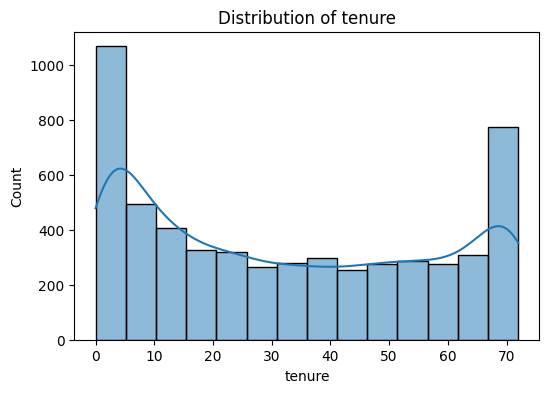

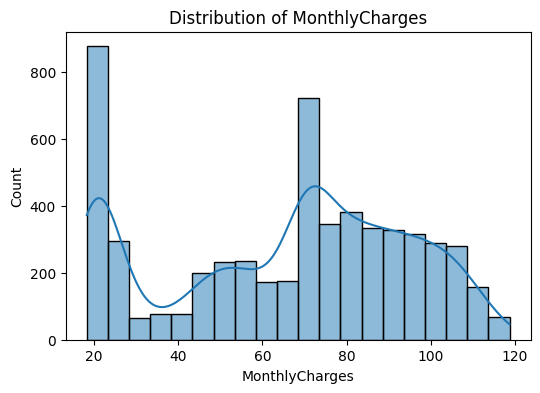

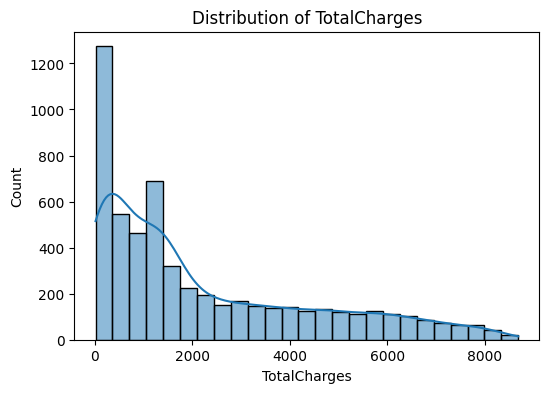

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_training[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


#Boxplots by Churn (Outlier + Target Relationship)

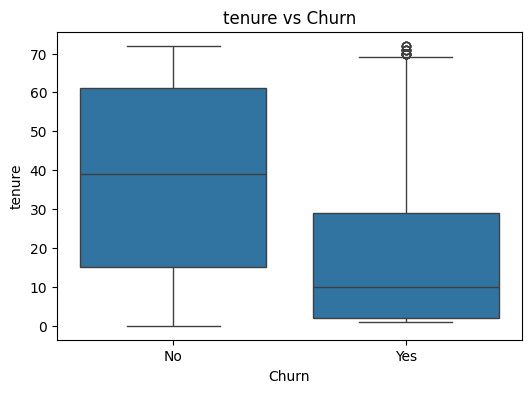

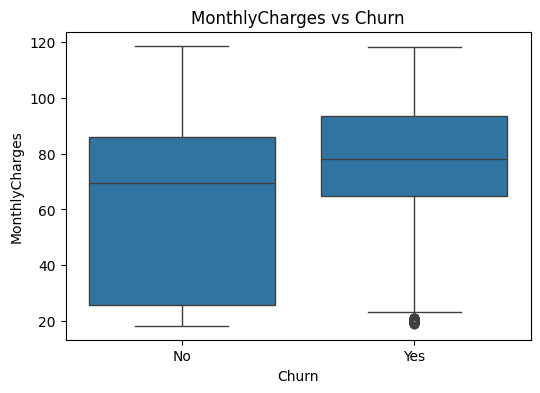

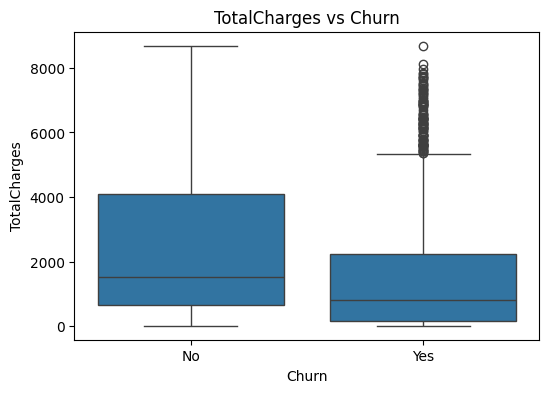

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df_training)
    plt.title(f'{col} vs Churn')
    plt.show()

#Encoding

In [ ]:
# a=df_training.select_dtypes(include=['object']).columns
# print(a)

In [ ]:
# binary_cols = ['Partner', 'Dependents', 'PhoneService',
#                'PaperlessBilling', 'Churn','gender']

# for col in binary_cols:
#     df_training[col] = df_training[col].map({'Yes': 1, 'No': 0})

In [ ]:
# multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
#                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# df_training = pd.get_dummies(df_training, columns=multi_class_cols, drop_first=True)


In [ ]:
# print(df_training.dtypes)
# print(df_training.head())

#Scaling

In [ ]:
df_training[num_cols].describe()

# Check skewness
df_training[num_cols].skew()  #skewness is close to 0, data is fairly normal → StandardScaler.
                              #skewness is far from 0 (±1 or more), and values have fixed bounds → MinMaxScaler.

,0
tenure,0.227944
MonthlyCharges,-0.283808
TotalCharges,1.039322


In [ ]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standard scaling for nearly normal features
df_training[['tenure', 'MonthlyCharges']] = standard_scaler.fit_transform(df_training[['tenure', 'MonthlyCharges']])

# MinMax scaling for skewed feature
df_training[['TotalCharges']] = minmax_scaler.fit_transform(df_training[['TotalCharges']])
df_training.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0.097232,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,-1.541793,0.078653,No
1,Female,0,-0.187173,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,-1.024876,0.108765,No
2,Male,0,0.950447,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,1.141008,0.641845,No
3,Male,0,0.259749,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),-1.552131,0.088986,No
4,Female,0,0.422266,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),-0.490728,0.246107,No


In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   tenure            5634 non-null   float64
 3   PhoneService      5634 non-null   object 
 4   MultipleLines     5634 non-null   object 
 5   InternetService   5634 non-null   object 
 6   OnlineSecurity    5634 non-null   object 
 7   OnlineBackup      5634 non-null   object 
 8   DeviceProtection  5634 non-null   object 
 9   TechSupport       5634 non-null   object 
 10  StreamingTV       5634 non-null   object 
 11  StreamingMovies   5634 non-null   object 
 12  Contract          5634 non-null   object 
 13  PaperlessBilling  5634 non-null   object 
 14  PaymentMethod     5634 non-null   object 
 15  MonthlyCharges    5634 non-null   float64
 16  TotalCharges      5634 non-null   float64


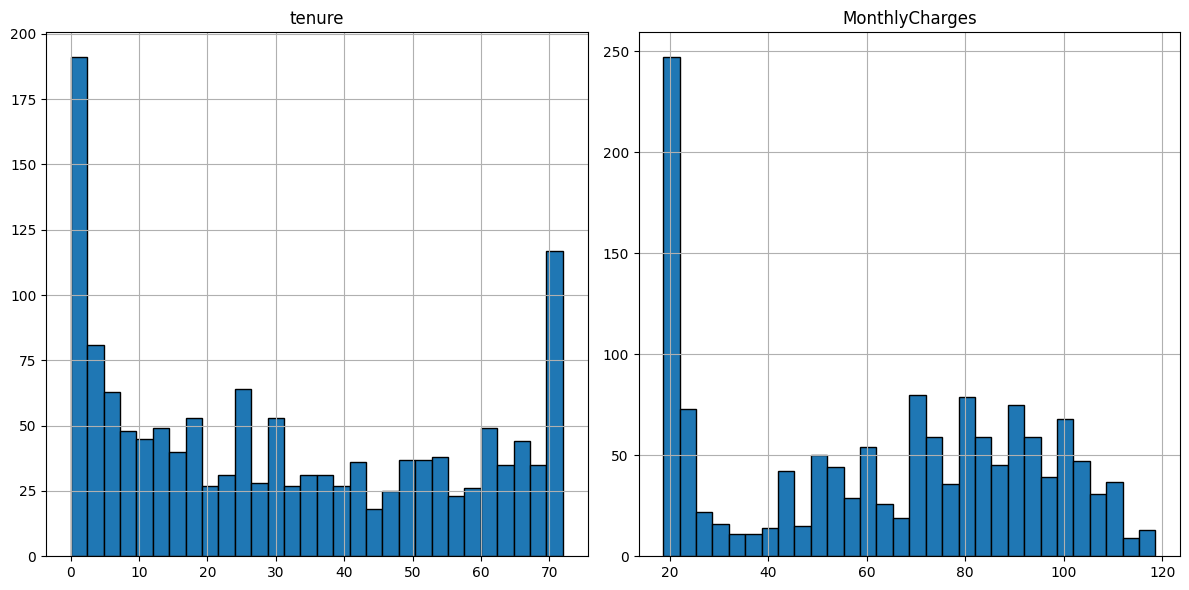

In [ ]:
desired_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Plot histograms for selected columns of test data set
df_testing[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_training['tenure'] = min_max_scale.fit_transform(df_training[['tenure']])
df_training['MonthlyCharges'] = min_max_scale.fit_transform(df_training[['MonthlyCharges']])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_training['TotalCharges'] = pd.to_numeric(df_training['TotalCharges'], errors='coerce')
# Impute missing values after converting to numeric
df_training['TotalCharges'] = df_training['TotalCharges'].fillna(df_training['TotalCharges'].mean())

df_training['TotalCharges'] = min_max_scale.fit_transform(df_training[['TotalCharges']])

In [ ]:
df_training.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0.486111,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0.024876,0.078653,No
1,Female,0,0.388889,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.174129,0.108765,No
2,Male,0,0.777778,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.799502,0.641845,No
3,Male,0,0.541667,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0.021891,0.088986,No
4,Female,0,0.597222,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.328358,0.246107,No


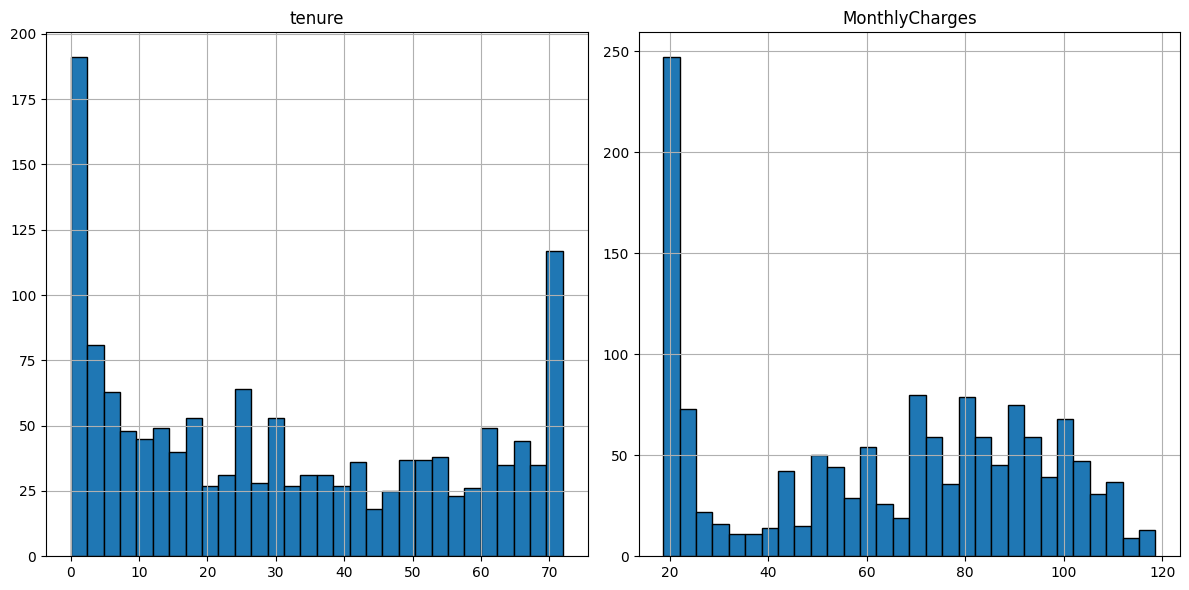

In [ ]:
# Plot histograms for selected columns of test data set
df_testing[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_testing['tenure'] = min_max_scale.fit_transform(df_testing[['tenure']])
df_testing['MonthlyCharges'] = min_max_scale.fit_transform(df_testing[['MonthlyCharges']])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_testing['TotalCharges'] = pd.to_numeric(df_testing['TotalCharges'], errors='coerce')
# Impute missing values after converting to numeric
df_testing['TotalCharges'] = df_testing['TotalCharges'].fillna(df_testing['TotalCharges'].mean())

df_testing['TotalCharges'] = min_max_scale.fit_transform(df_testing[['TotalCharges']])

In [ ]:
df_testing.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,0.555556,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.625626,0.383837,No
1,7285-KLOTR,Female,0,0.166667,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,0.602102,0.100600,No
2,7486-KSRVI,Male,0,0.597222,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,0.813814,0.491625,Yes
3,9924-JPRMC,Male,0,1.000000,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.995996,1.000000,No
4,4439-YRNVD,Female,0,0.138889,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,0.175676,0.041649,No


#Feature Engineering

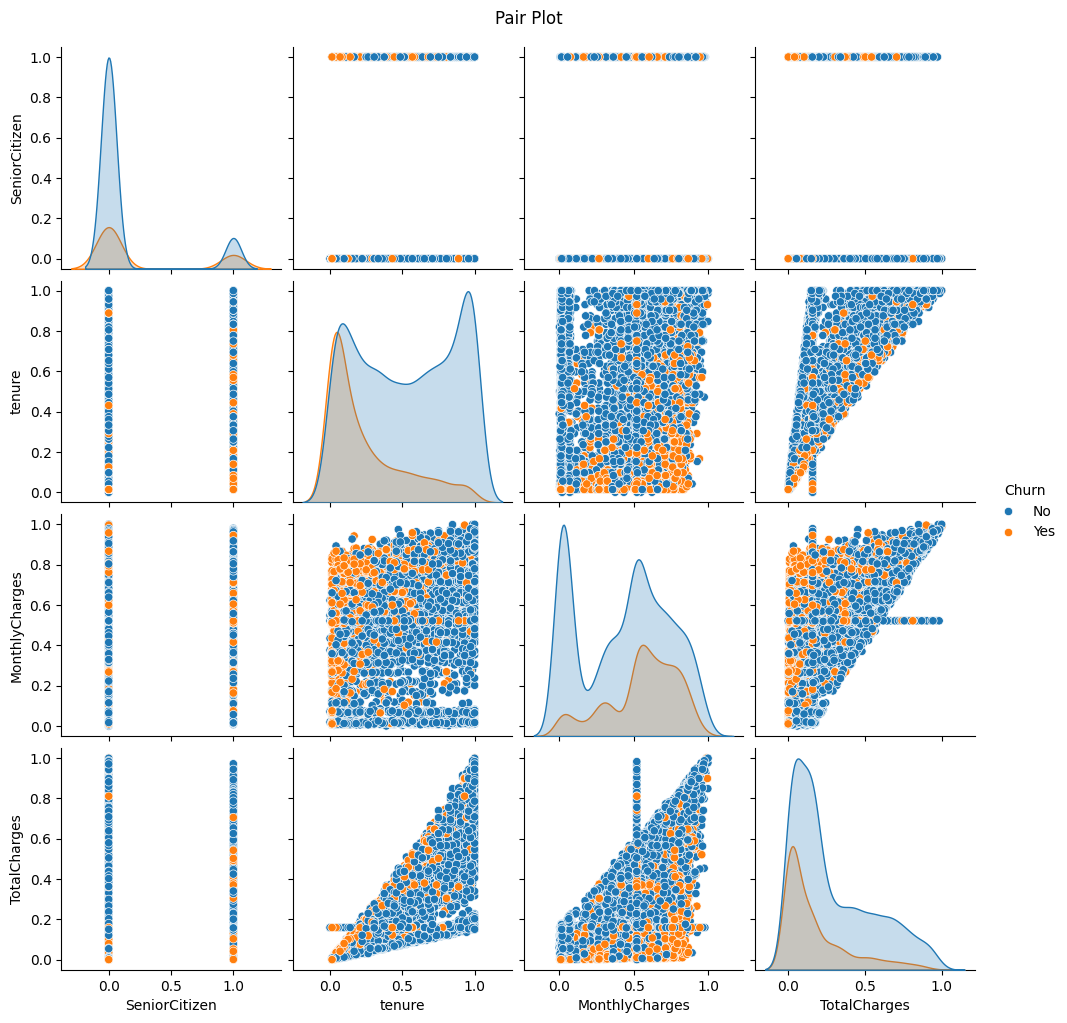

In [ ]:
sns.pairplot(data=df_training,hue='Churn')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

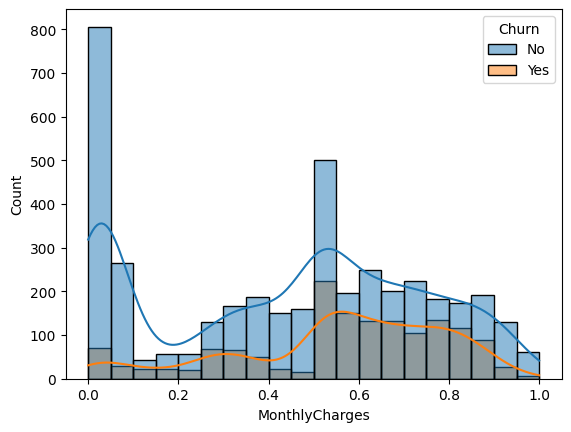

In [ ]:
sns.histplot(data=df_training, x='MonthlyCharges', kde=True, hue='Churn')
plt.show()

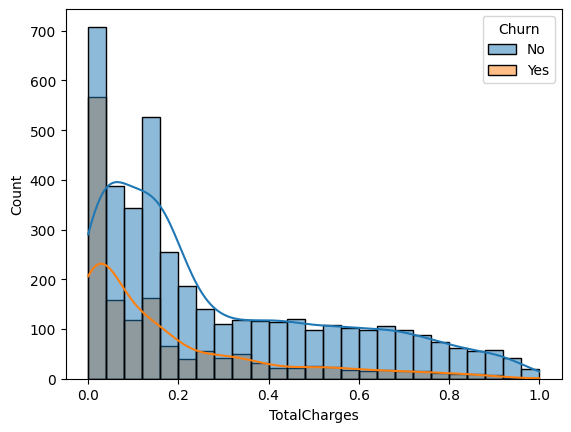

In [ ]:
sns.histplot(data=df_training, x='TotalCharges', kde=True, hue='Churn')
plt.show()

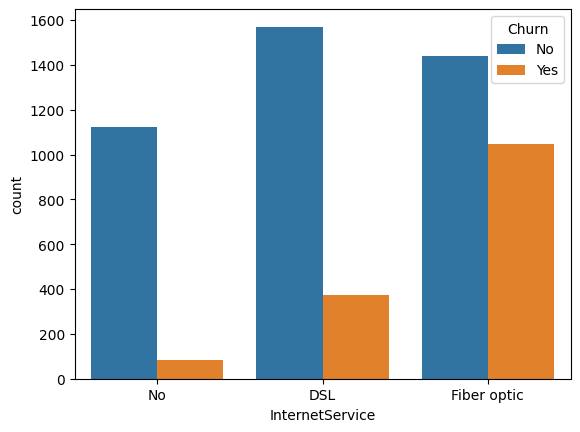

In [ ]:
sns.countplot(data=df_training, x='InternetService', hue='Churn')
plt.show()

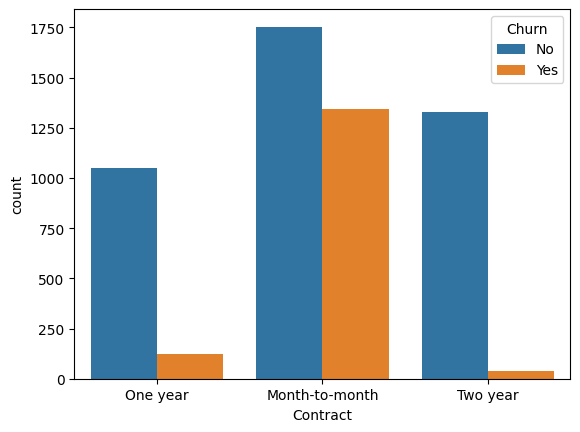

In [ ]:
sns.countplot(data=df_training, x='Contract', hue='Churn')
plt.show()

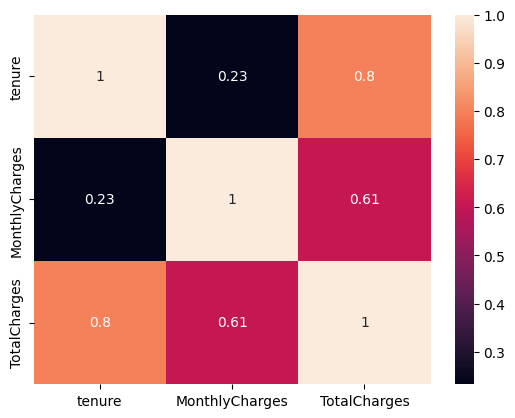

In [ ]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df_training[num_features].corr(), annot=True)
plt.show()

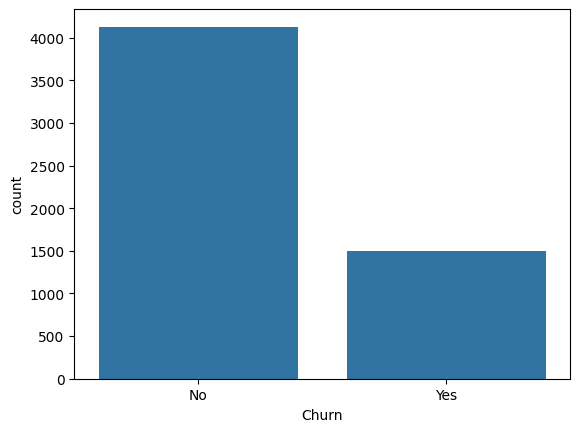

In [ ]:
sns.countplot(data=df_training, x='Churn')
plt.show()

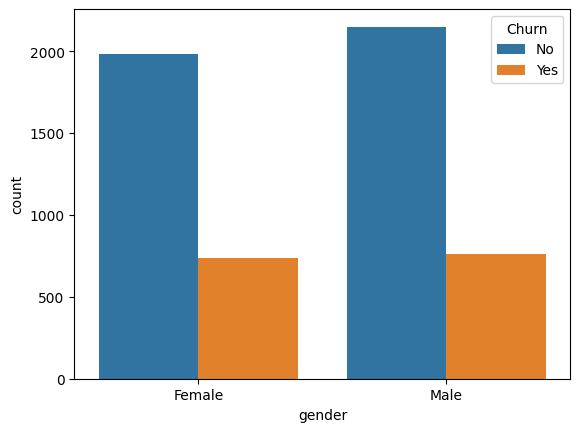

In [ ]:
sns.countplot(data=df_training, x='gender', hue='Churn')
plt.show()

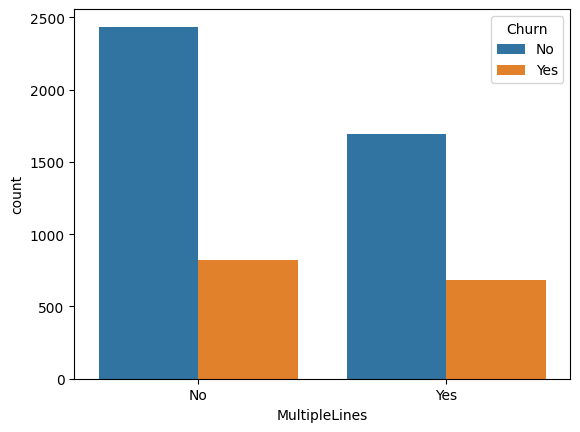

In [ ]:
sns.countplot(data=df_training, x='MultipleLines', hue='Churn')
plt.show()

## **Encoding**


###**Label encoding**

In [ ]:
# Label Encoding for target(Churn) and gender
label_enc = LabelEncoder()
df_training['Churn'] = label_enc.fit_transform(df_training['Churn'])
df_testing['Churn'] = label_enc.fit_transform(df_testing['Churn'])
df_training['gender'] = label_enc.fit_transform(df_training['gender'])
df_testing['gender'] = label_enc.fit_transform(df_testing['gender'])

In [ ]:
df_training['InternetService'] = label_enc.fit_transform(df_training['InternetService'])
df_testing['InternetService'] = label_enc.fit_transform(df_testing['InternetService'])

In [ ]:
df_training['PaymentMethod'] = label_enc.fit_transform(df_training['PaymentMethod'])
df_testing['PaymentMethod'] = label_enc.fit_transform(df_testing['PaymentMethod'])


### **Ordinal encoding**

In [ ]:
contract_order = ['Month-to-month', 'One year', 'Two year']

ordinal_enc = OrdinalEncoder(categories=[contract_order])

In [ ]:
df_training['Contract'] = ordinal_enc.fit_transform(df_training[['Contract']])
df_testing['Contract'] = ordinal_enc.fit_transform(df_testing[['Contract']])

### One-Hot Encoding

In [ ]:
df_training = pd.get_dummies(df_training,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)

In [ ]:
df_testing = pd.get_dummies(df_testing,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)

In [ ]:
df_training.head()

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,0,0.486111,2,1.0,3,0.024876,0.078653,0,1,0,0,0,0,0,0,0,0
1,0,0,0.388889,0,0.0,3,0.174129,0.108765,0,0,0,0,0,1,1,0,0,1
2,1,0,0.777778,1,0.0,2,0.799502,0.641845,0,1,1,0,1,0,0,1,1,0
3,1,0,0.541667,2,2.0,0,0.021891,0.088986,0,1,0,0,0,0,0,0,0,1
4,0,0,0.597222,0,1.0,0,0.328358,0.246107,0,0,0,0,1,0,1,1,0,1


In [ ]:
df_testing.head()

,customerID,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,6080-TCMYC,1,0,0.555556,1,0.0,2,0.625626,0.383837,0,1,1,0,0,1,0,0,0,1
1,7285-KLOTR,0,0,0.166667,0,1.0,2,0.602102,0.100600,0,1,1,1,0,1,0,1,1,0
2,7486-KSRVI,1,0,0.597222,1,1.0,2,0.813814,0.491625,1,1,1,0,0,0,1,1,1,1
3,9924-JPRMC,1,0,1.000000,1,2.0,2,0.995996,1.000000,0,1,1,1,1,1,1,1,1,1
4,4439-YRNVD,0,0,0.138889,0,0.0,2,0.175676,0.041649,0,0,0,0,1,0,1,0,0,0


# **Classification**

## **Model Building**

In [ ]:
X_training = df_training.drop('Churn', axis=1)
y_training = df_training['Churn']

X_testing = df_testing.drop('Churn', axis=1)
y_testing = df_testing['Churn']

In [ ]:
models = {
           "Logistic Regression": LogisticRegression(max_iter=1000),
           "SVM": SVC(),
           "Naive Bayes": GaussianNB(),
           "Random Forest": RandomForestClassifier(),
           "Decision Tree": DecisionTreeClassifier(),
           "KNN": KNeighborsClassifier()
}

In [ ]:
X = df_training.drop('Churn', axis=1)
y = df_training['Churn']

X_testing = df_testing.drop('Churn', axis=1)
y_testing = df_testing['Churn']

In [ ]:
X_train = df_training.drop('Churn', axis=1)
y_train = df_training['Churn']

X_test = df_testing.drop(['Churn', 'customerID'], axis=1) # Drop customerID from X_test
y_test = df_testing['Churn']

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.8140525195173882
Precision: 0.6710963455149501
Recall: 0.5534246575342465

K-Nearest Neighbors:
Accuracy: 0.7558552164655784
Precision: 0.5297450424929179
Recall: 0.5123287671232877

Naive Bayes:
Accuracy: 0.7565649396735273
Precision: 0.5228215767634855
Recall: 0.6904109589041096

Decision Tree:
Accuracy: 0.7281760113555713
Precision: 0.47643979057591623
Recall: 0.4986301369863014

Support Vector Machine:
Accuracy: 0.8097941802696949
Precision: 0.6611295681063123
Recall: 0.5452054794520548

Random Forest:
Accuracy: 0.7877927608232789
Precision: 0.6122448979591837
Recall: 0.4931506849315068


# **Comparison Between Models**

In [ ]:
model_comparison = {
    'Model': [
        'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes',
        'Decision Tree', 'Support Vector Machine', 'Random Forest'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_rf)
    ]
}

In [ ]:
df_comparison = pd.DataFrame(model_comparison)
print(df_comparison)

                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.814053   0.671096  0.553425
1     K-Nearest Neighbors  0.755855   0.529745  0.512329
2             Naive Bayes  0.756565   0.522822  0.690411
3           Decision Tree  0.728176   0.476440  0.498630
4  Support Vector Machine  0.809794   0.661130  0.545205
5           Random Forest  0.787793   0.612245  0.493151


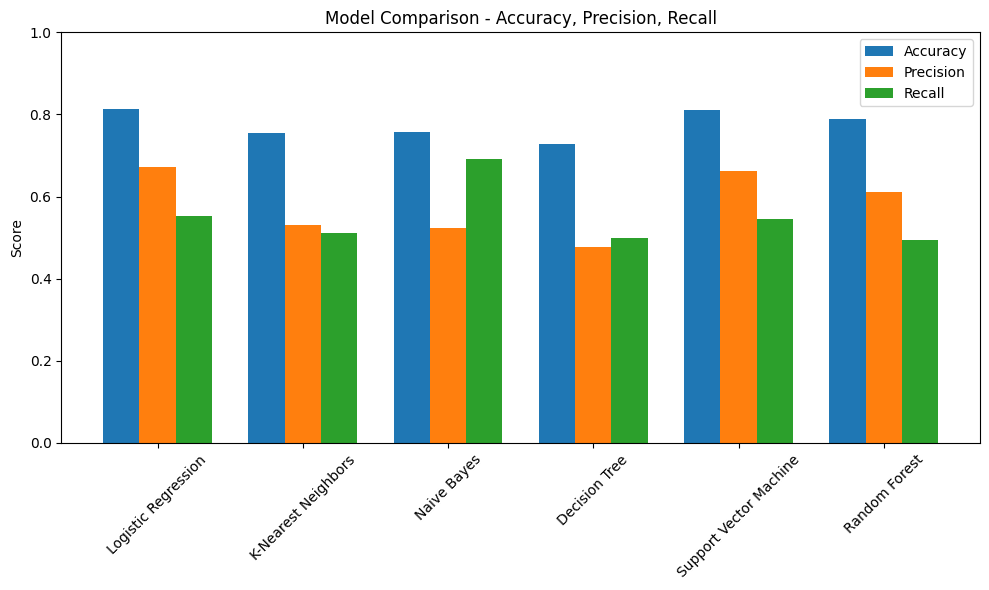

In [ ]:
# Create DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Set figure size
plt.figure(figsize=(10, 6))

# Number of models
x = np.arange(len(df_comparison['Model']))

# Bar width
width = 0.25

# Plot bars for Accuracy, Precision, Recall
plt.bar(x - width, df_comparison['Accuracy'], width=width, label='Accuracy')
plt.bar(x, df_comparison['Precision'], width=width, label='Precision')
plt.bar(x + width, df_comparison['Recall'], width=width, label='Recall')

# Labels and title
plt.xticks(x, df_comparison['Model'], rotation=45)
plt.ylabel("Score")
plt.ylim(0, 1)  # Because these are metric scores between 0 and 1
plt.title("Model Comparison - Accuracy, Precision, Recall")
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()

# **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_LR = cross_val_score(models['Logistic Regression'], X_train, y_train, cv=kf)
print("Logistic Regression Cross validation Accuracy:", cv_scores_LR)
print("Logistic Regression Cross validation mean Accuracy:", cv_scores_LR.mean())

Logistic Regression Cross validation Accuracy: [0.78881988 0.81011535 0.7905945  0.79680568 0.79840142]
Logistic Regression Cross validation mean Accuracy: 0.7969473649371711


In [ ]:
cv_scores_knn = cross_val_score(models['KNN'], X_train, y_train, cv=kf)
print("KNN Cross validation Accuracy:", cv_scores_knn)
print("KNN Cross validation mean Accuracy:", cv_scores_knn.mean())

KNN Cross validation Accuracy: [0.74534161 0.77196096 0.76397516 0.7755102  0.74777975]
KNN Cross validation mean Accuracy: 0.7609135367792959


In [ ]:
cv_scores_svm = cross_val_score(models['SVM'], X_train, y_train, cv=kf)
print("SVM Cross validation Accuracy:", cv_scores_svm)
print("SVM Cross validation mean Accuracy:", cv_scores_svm.mean())

SVM Cross validation Accuracy: [0.78970719 0.80212955 0.79325643 0.78881988 0.78685613]
SVM Cross validation mean Accuracy: 0.7921538342729167


In [ ]:
cv_scores_DT = cross_val_score(models['Decision Tree'], X_train, y_train, cv=kf)
print("Decission Tree Cross validation Accuracy:", cv_scores_DT)
print("Decission Tree Cross validation mean Accuracy:", cv_scores_DT.mean())

Decission Tree Cross validation Accuracy: [0.73025732 0.74090506 0.71694765 0.72227152 0.71580817]
Decission Tree Cross validation mean Accuracy: 0.7252379428874028


In [ ]:
cv_scores_forest = cross_val_score(models['Random Forest'], X_train, y_train, cv=kf)
print("Random Forest Cross validation Accuracy:", cv_scores_forest)
print("Random Forest Cross validation mean Accuracy:", cv_scores_forest.mean())

Random Forest Cross validation Accuracy: [0.79148181 0.79591837 0.78615794 0.7985803  0.78241563]
Random Forest Cross validation mean Accuracy: 0.7909108102272494


## **Bagging**

In [ ]:
# Bagging is done on the training data

print(f"Accuracy of a simple Decision tree model :{df_comparison.loc[df_comparison['Model'] == 'Decision Tree', 'Accuracy'].iloc[0]}")
bagging_model_DT = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_DT.fit(X_train, y_train) # training the bagging model
y_pred_bagging_dt = bagging_model_DT.predict(X_test) #predict using the bagging
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
print(f"Accuracy of Bagging model :{accuracy_bagging_dt}")

Accuracy of a simple Decision tree model :0.7281760113555713
Accuracy of Bagging model :0.759403832505323


In [ ]:
print(f"Accuracy of a simple Logistic Regression model :{df_comparison.loc[df_comparison['Model'] == 'Logistic Regression', 'Accuracy'].iloc[0]}")
bagging_model_LR = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_LR.fit(X_train, y_train) # training the bagging model
y_pred_bagging_lr = bagging_model_LR.predict(X_test) #predict using the bagging
accuracy_bagging_lr = accuracy_score(y_test, y_pred_bagging_lr)
print(f"Accuracy of Bagging model :{accuracy_bagging_lr}")

Accuracy of a simple Logistic Regression model :0.8140525195173882
Accuracy of Bagging model :0.8119233498935415


In [ ]:
print(f"Accuracy of a simple k-NN model :{df_comparison.loc[df_comparison['Model'] == 'K-Nearest Neighbors', 'Accuracy'].iloc[0]}")
bagging_model_KNN = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_KNN.fit(X_train, y_train) # training the bagging model
y_pred_bagging_knn = bagging_model_KNN.predict(X_test) #predict using the bagging
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
print(f"Accuracy of Bagging model :{accuracy_bagging_knn}")

Accuracy of a simple k-NN model :0.7558552164655784
Accuracy of Bagging model :0.7714691270404542


In [ ]:
print(f"Accuracy of a simple Naive-Bayes model :{df_comparison.loc[df_comparison['Model'] == 'Naive Bayes', 'Accuracy'].iloc[0]}")
bagging_model_NB = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_NB.fit(X_train, y_train) # training the bagging model
y_pred_bagging_nb = bagging_model_NB.predict(X_test) #predict using the bagging
accuracy_bagging_nb = accuracy_score(y_test, y_pred_bagging_nb)
print(f"Accuracy of Bagging model :{accuracy_bagging_nb}")

Accuracy of a simple Naive-Bayes model :0.7565649396735273
Accuracy of Bagging model :0.7572746628814763


In [ ]:
print(f"Accuracy of a simple SVM model :{df_comparison.loc[df_comparison['Model'] == 'Support Vector Machine', 'Accuracy'].iloc[0]}")
bagging_model_SVM = BaggingClassifier(
    estimator=SVC(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_SVM.fit(X_train, y_train) # training the bagging model
y_pred_bagging_svm = bagging_model_SVM.predict(X_test) #predict using the bagging
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
print(f"Accuracy of Bagging model :{accuracy_bagging_svm}")

Accuracy of a simple SVM model :0.8097941802696949
Accuracy of Bagging model :0.8097941802696949


In [ ]:
print(f"Accuracy of a simple Random Forest model :{df_comparison.loc[df_comparison['Model'] == 'Random Forest', 'Accuracy'].iloc[0]}")
bagging_model_RF = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_RF.fit(X_train, y_train) # training the bagging model
y_pred_bagging_rf = bagging_model_RF.predict(X_test) #predict using the bagging
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print(f"Accuracy of Bagging model :{accuracy_bagging_rf}")

Accuracy of a simple Random Forest model :0.7877927608232789
Accuracy of Bagging model :0.7991483321504613


## **Boosting**

In [ ]:
# to compare, we are reusing the Decision tree we build earlier
print(f"Accuracy of a simple Decision tree model :{df_comparison.loc[df_comparison['Model'] == 'Decision Tree', 'Accuracy'].iloc[0]}")

ada_boost_clf_DT = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_DT.fit(X_train, y_train) # model training
y_pred_ada_boost_dt = ada_boost_clf_DT.predict(X_test) # Model Prediction
accuracy_ada_boost_dt = accuracy_score(y_test, y_pred_ada_boost_dt)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_dt}")

Accuracy of a simple Decision tree model :0.7281760113555713
Accuracy of Boosting model :0.7317246273953159


In [ ]:
print(f"Accuracy of a simple Logistic Regression model :{df_comparison.loc[df_comparison['Model'] == 'Logistic Regression', 'Accuracy'].iloc[0]}")

ada_boost_clf_LR = AdaBoostClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_LR.fit(X_train, y_train) # model training
y_pred_ada_boost_lr = ada_boost_clf_LR.predict(X_test) # Model Prediction
accuracy_ada_boost_lr = accuracy_score(y_test, y_pred_ada_boost_lr)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_lr}")

Accuracy of a simple Logistic Regression model :0.8140525195173882
Accuracy of Boosting model :0.7409510290986515


In [ ]:
print(f"Accuracy of a simple Naive-Bayes model :{df_comparison.loc[df_comparison['Model'] == 'Naive Bayes', 'Accuracy'].iloc[0]}")

ada_boost_clf_NB = AdaBoostClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_NB.fit(X_train, y_train) # model training
y_pred_ada_boost_nb = ada_boost_clf_NB.predict(X_test) # Model Prediction
accuracy_ada_boost_nb = accuracy_score(y_test, y_pred_ada_boost_nb)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_nb}")

Accuracy of a simple Naive-Bayes model :0.7565649396735273
Accuracy of Boosting model :0.7608232789212207


In [ ]:
print(f"Accuracy of a simple SVM model :{df_comparison.loc[df_comparison['Model'] == 'Support Vector Machine', 'Accuracy'].iloc[0]}")

ada_boost_clf_SVM = AdaBoostClassifier(
    estimator=SVC(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_SVM.fit(X_train, y_train) # model training
y_pred_ada_boost_svm = ada_boost_clf_SVM.predict(X_test) # Model Prediction
accuracy_ada_boost_svm = accuracy_score(y_test, y_pred_ada_boost_svm)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_svm}")

Accuracy of a simple SVM model :0.8097941802696949
Accuracy of Boosting model :0.7409510290986515


In [ ]:
print(f"Accuracy of a simple Random Forest model :{df_comparison.loc[df_comparison['Model'] == 'Random Forest', 'Accuracy'].iloc[0]}")

ada_boost_clf_RF = AdaBoostClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_RF.fit(X_train, y_train) # model training
y_pred_ada_boost_rf = ada_boost_clf_RF.predict(X_test) # Model Prediction
accuracy_ada_boost_rf = accuracy_score(y_test, y_pred_ada_boost_rf)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_rf}")

Accuracy of a simple Random Forest model :0.7877927608232789
Accuracy of Boosting model :0.7892122072391767


# **Stacking**

In [ ]:
model_LR_1 = LogisticRegression(max_iter=120)
model_KNN_1 = KNeighborsClassifier(n_neighbors=3)
model_SVM_1 = SVC()
model_DT_1 = DecisionTreeClassifier()
model_RF_1 = RandomForestClassifier()

# base models (models considered for stacking)
base_learners = [('LR', model_LR_1), ('DT', model_DT_1), ('kNN', model_KNN_1), ('SVM', model_SVM_1), ('RF', model_RF_1)]

# meta model (this can be any classification model)
meta_leaner = GaussianNB()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_leaner) #stacking model building

stacking_clf.fit(X_train, y_train) # stacking model training
y_pred_stacking = stacking_clf.predict(X_test) # stacking model prediction

accuracy_stack = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy of stacking model :{accuracy_stack}')

Accuracy of stacking model :0.7821149751596878


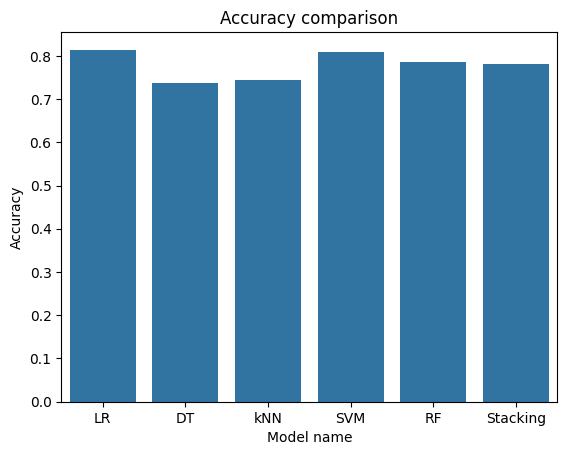

In [ ]:
# comparion of accuracy
results={} # dictionary to store (model_name)
for name, model in base_learners:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = accuracy_score(y_test, y_pred)
  # populating 'results' dictionary with name of the model and accuracy

results['Stacking'] = accuracy_stack # adding the stack model accuracy to

sns.barplot(x= list(results.keys()), y= list(results.values()))
plt.title('Accuracy comparison')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Example: separate categorical & numerical features
categorical_features = df_training.select_dtypes(include=['object']).columns
numerical_features = df_training.select_dtypes(exclude=['object']).columns.drop('Churn')  # replace with actual target

# Transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Build pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Example: train & evaluate
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.8162
KNN Accuracy: 0.7601
Naive Bayes Accuracy: 0.7566
SVM Accuracy: 0.8091
Decision Tree Accuracy: 0.7360
Random Forest Accuracy: 0.7807
Bagging Accuracy: 0.7864
AdaBoost Accuracy: 0.8084


In [ ]:
# Save the trained pipeline
import joblib
joblib.dump(pipelines["Logistic Regression"], 'customer_churn_pipeline.pkl')

print("Pipeline saved as customer_churn_pipeline.pkl")

Pipeline saved as customer_churn_pipeline.pkl
